## Załadowanie podstawowych bibliotek

In [107]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/mion/s/259/mnajbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Przygotowanie danych
#### Wczytywanie danych w formacie .csv

In [108]:
fake = pd.read_csv("Fake.csv", sep = ",")
fake['fake_news_flag'] = 1

true = pd.read_csv("True.csv", sep = ",")
true['fake_news_flag'] = 0

In [109]:
# true.shape
# false.shape

#### Stworzenie zbioru news jako połączenia zbiorów fake i true

In [110]:
news = pd.concat([fake, true])
news.head()

,title,text,subject,date,fake_news_flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


#### Zredukowanie zbioru do 10% próbki danych

In [111]:
news = news.sample(frac = 0.1)

In [112]:
print(news.shape)
print(news.info())

(4490, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490 entries, 8807 to 16873
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4490 non-null   object
 1   text            4490 non-null   object
 2   subject         4490 non-null   object
 3   date            4490 non-null   object
 4   fake_news_flag  4490 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 210.5+ KB
None


#### Oczyszczanie danych w kolumnie text

In [113]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [114]:
news["text_cleaned"] = news['text'].apply(preprocessor)

In [115]:
news.head()

,title,text,subject,date,fake_news_flag,text_cleaned
8807,"Populism is a 'dangerous' trend in EU, U.S.: E...",BEIJING (Reuters) - European Trade Commissione...,politicsNews,"July 11, 2016",0,beijing reuters european trade commissioner ce...
10508,BREAKING: CNN PRODUCER Caught On Undercover Vi...,Project Veritas newest video from the America...,politics,"Jun 30, 2017",1,project veritas newest video from the american...
11662,VIOLENT NPR EMPLOYEE Who Is Also A Refugee ARR...,On Monday Politico reported that a protester w...,politics,"Feb 14, 2017",1,on monday politico reported that a protester w...
18931,Half of Filipinos don't believe police account...,MANILA (Reuters) - Around half of Filipinos be...,worldnews,"September 27, 2017",0,manila reuters around half of filipinos believ...
11468,Congo Republic signs peace accord with 'Ninja'...,BRAZZAVILLE (Reuters) - The government of Cong...,worldnews,"December 23, 2017",0,brazzaville reuters the government of congo re...


In [116]:
news["title"] = news['title'].apply(preprocessor)

In [117]:
news.head()

,title,text,subject,date,fake_news_flag,text_cleaned
8807,populism is a dangerous trend in eu u s eu tra...,BEIJING (Reuters) - European Trade Commissione...,politicsNews,"July 11, 2016",0,beijing reuters european trade commissioner ce...
10508,breaking cnn producer caught on undercover vid...,Project Veritas newest video from the America...,politics,"Jun 30, 2017",1,project veritas newest video from the american...
11662,violent npr employee who is also a refugee arr...,On Monday Politico reported that a protester w...,politics,"Feb 14, 2017",1,on monday politico reported that a protester w...
18931,half of filipinos don t believe police account...,MANILA (Reuters) - Around half of Filipinos be...,worldnews,"September 27, 2017",0,manila reuters around half of filipinos believ...
11468,congo republic signs peace accord with ninja r...,BRAZZAVILLE (Reuters) - The government of Cong...,worldnews,"December 23, 2017",0,brazzaville reuters the government of congo re...


In [118]:
news["text"].isna().value_counts()

False    4490
Name: text, dtype: int64

#### Tokenizacja danych

In [119]:
from nltk import word_tokenize
tqdm.pandas()

In [120]:
news["text_tokenized"] = news['text'].progress_apply(word_tokenize)

100%|██████████| 4490/4490 [00:13<00:00, 322.05it/s]


#### Stematyzacja danych

In [121]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(tokens):
    return [porter.stem(token) for token in tokens]

In [122]:
news['text_stemmed'] = news['text_tokenized'].progress_apply(tokenizer_porter)

100%|██████████| 4490/4490 [00:26<00:00, 168.25it/s]


In [123]:
news.head()

,title,text,subject,date,fake_news_flag,text_cleaned,text_tokenized,text_stemmed
8807,populism is a dangerous trend in eu u s eu tra...,BEIJING (Reuters) - European Trade Commissione...,politicsNews,"July 11, 2016",0,beijing reuters european trade commissioner ce...,"[BEIJING, (, Reuters, ), -, European, Trade, C...","[beij, (, reuter, ), -, european, trade, commi..."
10508,breaking cnn producer caught on undercover vid...,Project Veritas newest video from the America...,politics,"Jun 30, 2017",1,project veritas newest video from the american...,"[Project, Veritas, newest, video, from, the, A...","[project, verita, newest, video, from, the, am..."
11662,violent npr employee who is also a refugee arr...,On Monday Politico reported that a protester w...,politics,"Feb 14, 2017",1,on monday politico reported that a protester w...,"[On, Monday, Politico, reported, that, a, prot...","[On, monday, politico, report, that, a, protes..."
18931,half of filipinos don t believe police account...,MANILA (Reuters) - Around half of Filipinos be...,worldnews,"September 27, 2017",0,manila reuters around half of filipinos believ...,"[MANILA, (, Reuters, ), -, Around, half, of, F...","[manila, (, reuter, ), -, around, half, of, fi..."
11468,congo republic signs peace accord with ninja r...,BRAZZAVILLE (Reuters) - The government of Cong...,worldnews,"December 23, 2017",0,brazzaville reuters the government of congo re...,"[BRAZZAVILLE, (, Reuters, ), -, The, governmen...","[brazzavil, (, reuter, ), -, the, govern, of, ..."


In [124]:
news.isna().sum()
# news = news.dropna(subset=['text'])

title             0
text              0
subject           0
date              0
fake_news_flag    0
text_cleaned      0
text_tokenized    0
text_stemmed      0
dtype: int64

In [125]:
news.isnull().sum()

title             0
text              0
subject           0
date              0
fake_news_flag    0
text_cleaned      0
text_tokenized    0
text_stemmed      0
dtype: int64

In [126]:
sum(news["text"]=='')

0

## Analiza danych

#### Analiza kolumny fake_news_flag

In [127]:
news['fake_news_flag'].value_counts()

1    2440
0    2050
Name: fake_news_flag, dtype: int64

#### Analiza kolumny subject

In [128]:
news['subject'].value_counts()

worldnews          1028
politicsNews       1022
News                951
politics            697
left-news           457
Government News     165
US_News              90
Middle-east          80
Name: subject, dtype: int64

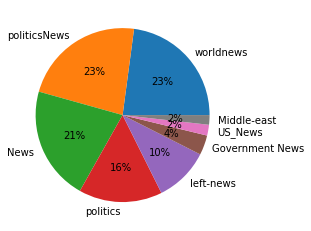

In [129]:
plot = plt.pie(news['subject'].value_counts(), labels = news['subject'].value_counts().index, autopct='%1.0f%%')
plt.show()

#### Analiza kolumny text

In [130]:
from collections import Counter

Histogram liczby znaków w newsach


count    4490.000000
mean      404.991759
std       331.902209
min         0.000000
25%       205.000000
50%       363.000000
75%       511.000000
max      7033.000000
Name: text, dtype: float64

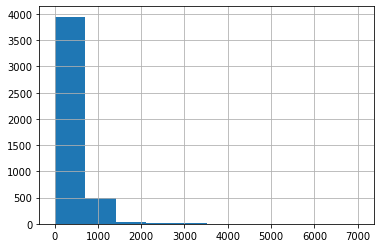

In [131]:
word_count = news['text'].str.split().map(lambda x: len(x))
word_count.hist()
print("Histogram liczby znaków w newsach")
word_count.describe()

In [132]:
corpus = []
for x in news['text'].str.split():
    corpus.extend(x)

# len(corpus)
counter = Counter(corpus)

In [133]:
most = counter.most_common()
print(most[0:10])

[('the', 90324), ('to', 53021), ('of', 43636), ('and', 39159), ('a', 38288), ('in', 31963), ('that', 22318), ('on', 17897), ('s', 17862), ('for', 16617)]


In [134]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mion/s/259/mnajbar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
most_nostop = []
for word, count in most:
    if word.lower() not in stop:
        most_nostop.append((word, count))

40 najczęściej występujących slów w korpusie


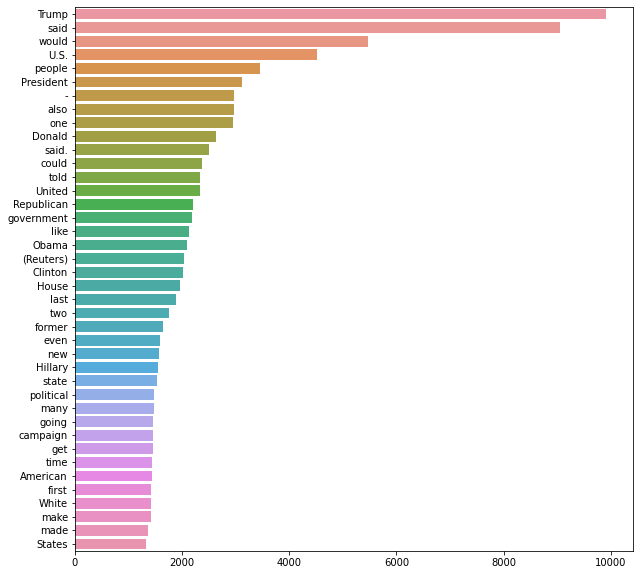

In [136]:
first_n = 40
x, y= [], []
for word,count in most_nostop[:first_n]:
        x.append(word)
        y.append(count)

plt.figure(figsize=(10, 10))
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących slów w korpusie")

## Trenowanie  modelu opartego o reprezentację BoW

#### Przygotowanie danych do modelu

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [138]:
X_train, X_test, y_train, y_test = train_test_split(news["text_stemmed"], news["fake_news_flag"], test_size=0.3, random_state=42)

In [139]:
print(X_train.head(2))
print(y_train.head(2))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

17926    [(, reuter, ), -, about, six, in, 10, peopl, w...
8181     [presid, obama, is, near, the, end, of, hi, ti...
Name: text_stemmed, dtype: object
17926    0
8181     1
Name: fake_news_flag, dtype: int64
(3143,)
(3143,)
(1347,)
(1347,)


In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
def do_nothing(tokens):
    return tokens

bow_count = CountVectorizer(tokenizer=do_nothing,
                             preprocessor=None,
                             lowercase=False)

In [142]:
X_train_bow_count = bow_count.fit_transform(X_train)
X_test_bow_count = bow_count.transform(X_test)

#### Model

In [143]:
from sklearn.naive_bayes import MultinomialNB

In [144]:
clf = MultinomialNB()
clf.fit(X_train_bow_count, y_train)

MultinomialNB()

#### Ocena modelu

In [145]:
y_train_pred = clf.predict(X_train_bow_count)
y_test_pred = clf.predict(X_test_bow_count)
multiNB_bow_train_score = accuracy_score(y_train, y_train_pred)
multiNB_bow_test_score = accuracy_score(y_test, y_test_pred)
print(f"multiNB_bow_score na zbiorze treningowym: {multiNB_bow_train_score:.3f}")
print(f"multiNB_bow_score na zbiorze testowym: {multiNB_bow_test_score:.3f}")

multiNB_bow_score na zbiorze treningowym: 0.988
multiNB_bow_score na zbiorze testowym: 0.975


In [146]:
print(classification_report(y_test, y_test_pred, target_names=['True news','Fake news']))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

   True news       0.96      0.99      0.97       630
   Fake news       0.99      0.96      0.98       717

    accuracy                           0.97      1347
   macro avg       0.97      0.98      0.97      1347
weighted avg       0.98      0.97      0.97      1347

[[625   5]
 [ 29 688]]


## Modele regresji logistycznej

#### Przygotowanie danych do modelu TF-IDF

In [147]:
X_train, X_test, y_train, y_test = train_test_split(news["text_cleaned"], news["fake_news_flag"], test_size=0.3, random_state=42)

In [148]:
print(X_train.head(2))
print(y_train.head(2))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

17926     reuters about six in 10 people want british p...
8181     president obama is nearing the end of his time...
Name: text_cleaned, dtype: object
17926    0
8181     1
Name: fake_news_flag, dtype: int64
(3143,)
(3143,)
(1347,)
(1347,)


In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [151]:
print(X_train_tf.shape)
print(X_test_tf.shape)

(3143, 38050)
(1347, 38050)


#### Model

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
clf = LogisticRegression(random_state=0, C=1000, max_iter=20)

In [154]:
%%time
clf.fit(X_train_tf, y_train)

CPU times: user 1.07 s, sys: 765 ms, total: 1.84 s
Wall time: 791 ms


/opt/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000, max_iter=20, random_state=0)

#### Ocena modelu

In [155]:
y_train_pred = clf.predict(X_train_tf)
y_test_pred = clf.predict(X_test_tf)
LR_train_score = accuracy_score(y_train, y_train_pred)
LR_test_score = accuracy_score(y_test, y_test_pred)
print(f"Wynik regresji logistycznej na zbiorze treningowym: {LR_train_score:.3f}")
print(f"Wynik regresji logistycznej na zbiorze testowym: {LR_test_score:.3f}")

Wynik regresji logistycznej na zbiorze treningowym: 1.000
Wynik regresji logistycznej na zbiorze testowym: 0.982


In [156]:
print(classification_report(y_test, y_test_pred, target_names=['True news','Fake news']))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

   True news       0.98      0.98      0.98       630
   Fake news       0.98      0.98      0.98       717

    accuracy                           0.98      1347
   macro avg       0.98      0.98      0.98      1347
weighted avg       0.98      0.98      0.98      1347

[[619  11]
 [ 13 704]]


#### Modelowanie z użyciem reprezentacji Latent Semantic Analysis

#### Przygotowanie danych do modelu z redukcją danych do 2 wymiarów

In [157]:
from sklearn.decomposition import TruncatedSVD

In [158]:
svd = TruncatedSVD(random_state=42)
x_train_svd = svd.fit_transform(X_train_tf)
x_test_svd = svd.transform(X_test_tf)

In [159]:
print(x_train_svd.shape)
print(svd.explained_variance_ratio_.round(2))
print(f"Ile procent wariancji wyjaśniają wybrane wymiary macierzy SVD {svd.explained_variance_ratio_.sum().round(2)}")

(3143, 2)
[0.01 0.01]
Ile procent wariancji wyjaśniają wybrane wymiary macierzy SVD 0.03


#### Model z redukcją danych do 2 wymiarów

In [160]:
clf.fit(x_train_svd, y_train)

LogisticRegression(C=1000, max_iter=20, random_state=0)

#### Ocena modelu

In [161]:
y_pred = clf.predict(x_test_svd)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       638
           1       0.81      0.82      0.82       709

    accuracy                           0.81      1347
   macro avg       0.81      0.81      0.81      1347
weighted avg       0.81      0.81      0.81      1347



#### Przygotowanie danych do modelu z redukcją danych do 1000 wymiarów

In [162]:
%%time
svd = TruncatedSVD(random_state=42, n_components = 1000, n_iter = 10)
x_train_svd = svd.fit_transform(X_train_tf)
print(f"Ile procent wariancji wyjaśniają wybrane wymiary macierzy SVD {svd.explained_variance_ratio_.sum().round(2)}")

Ile procent wariancji wyjaśniają wybrane wymiary macierzy SVD 0.66
CPU times: user 6min 13s, sys: 7min 40s, total: 13min 53s
Wall time: 2min 48s


#### Model z redukcją danych do 1000 wymiarów

In [163]:
x_test_svd = svd.transform(X_test_tf)

#### Ocena modelu

In [164]:
clf.fit(x_train_svd, y_train)
print(f"Accuracy na zbiorze treningowym {accuracy_score(y_train, clf.predict(x_train_svd)):.3f}")
print(f"Accuracy na zbiorze testowym {accuracy_score(y_test, clf.predict(x_test_svd)):.3f}")
y_pred = clf.predict(x_test_svd)
print(classification_report(y_pred, y_test))

Accuracy na zbiorze treningowym 1.000
Accuracy na zbiorze testowym 0.981
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       631
           1       0.98      0.98      0.98       716

    accuracy                           0.98      1347
   macro avg       0.98      0.98      0.98      1347
weighted avg       0.98      0.98      0.98      1347



/opt/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Modelowanie za pomocą Feature hashing/hashing trick

#### Przygotowywanie danych

In [165]:
from sklearn.feature_extraction.text import HashingVectorizer

In [166]:
hash_vectorizer = HashingVectorizer(n_features=10000)
# ?HashingVectorizer

In [167]:
x_train_hash = hash_vectorizer.fit_transform(X_train)
x_test_hash = hash_vectorizer.transform(X_test)

In [168]:
x_train_hash.shape

(3143, 10000)

#### Model

In [169]:
clf.fit(x_train_hash, y_train)

/opt/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000, max_iter=20, random_state=0)

#### Ocena modelu

In [170]:
clf.fit(x_train_hash, y_train)
print(f"Accuracy na zbiorze treningowym {accuracy_score(y_train, clf.predict(x_train_hash)):.3f}")
print(f"Accuracy na zbiorze testowym {accuracy_score(y_test, clf.predict(x_test_hash)):.3f}")
y_pred = clf.predict(x_test_hash)
print(classification_report(y_pred, y_test))

Accuracy na zbiorze treningowym 1.000
Accuracy na zbiorze testowym 0.986
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       631
           1       0.99      0.99      0.99       716

    accuracy                           0.99      1347
   macro avg       0.99      0.99      0.99      1347
weighted avg       0.99      0.99      0.99      1347



/opt/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
